In [1]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.fftpack import fft, fftfreq, ifft
from scipy.optimize import *
import pandas as pd
from scipy.signal import find_peaks

In [2]:
# Definitions
class sample:
    def __init__(self, i, f, wav):                        # start/end (sec) wave object
        self.wav = wav
        self.x = self.getRange(wav.x, i, f)
        self.shift = self.x[0]
        self.x = self.x - self.shift
        self.y = self.getRange(wav.y, i, f)
        self.fourier()
        self.t_function = np.array([self.x, self.y]).transpose()
        self.f_function = np.array([self.x, self.y]).transpose()
        self.roundtime = lambda t: t - (t % (self.x[1]-self.x[0]))                       # Finds nearst time in data
        self.timeIndex = lambda x: np.where(self.x==self.roundtime(x))[0]                # Calculates the index of a time
        self.freqIndex = lambda f: np.where(self.sx==f)[0]                               # Calculates the index of a frequency
        self.frequency = lambda i: self.sx[i]                                            # Returns the frequency from index
        self.fundfreq = self.frequency(np.where(self.sy==max(self.sy))[0][0])
        self.fundtime = 1.0 / self.fundfreq
        self.t_axis = [0, self.wav.time, -1, 1]
        self.f_axis = [0, 1000, 0, 1.2]
        self.object = np.array([list(self.x), list(self.y), list(self.sx), list(self.sy)])
    def fourier(self):
        self.size = fft(self.y).shape[-1] // 2             # Size of the positive half of the fourier transform
        self.sx = fftfreq(self.wav.cycles, 1.0/self.wav.rate)[:self.size]
        self.sy = np.abs(fft(self.y))[:self.size]
        self.sy /= max(self.sy)                           # Normalizes Fourier Plot
    def getRange(self, y, ti, tf):
        return np.array(y[int(44100.0 * ti):int(44100.0 * tf)])
    def amplitude(self, i):                               # Amplitude from Index
        delta = 20
        st, en = map(int, [i - delta, i + delta])
        return max(self.sy[st:en])
    def amplitude2(self, i):
        delta = 50
        st, en = map(int, [i - delta, i + delta])
        return max(self.y[st:en])
    def getPeaks(self):
        px = [(k * self.fundtime) for k in range(1,self.wav.cycles)]
        py = [self.getAmp(self.getIndex(k * self.fundtime, time), time) for k in range(1,self.wav.cycles)]
        return px, py
    def getUpperCurve(self):
        x = [k * self.fundtime + self.x[np.where(self.y==max(self.y))[0][0]] for k in range(1, 300)]
        y = [self.amplitude2(self.timeIndex(i)[0]) for i in x]
        return x, y
    def findInflectionPoint(self):
        pts = self.getUpperCurve()
        c1, _ = curve_fit(lambda t, a, b: a * np.exp(b * t), pts[0][:10], pts[1][:10])         # Returns a, b for A*e(Bt)
        c2, _ = curve_fit(lambda t, a, b: a * np.exp(b * t), pts[0][20:30], pts[1][20:30])
        f1 = lambda t: c1[0] * np.exp(c1[1] * t)
        f2 = lambda t: c2[0] * np.exp(c2[1] * t)
        x_int = np.log(c2[0] / c1[0]) / (c1[1] - c2[1])
        plt.plot(pts[0], pts[1], 'ro', 
         pts[0], list(map(f1, pts[0])), 'b-', 
         pts[0], list(map(f2, pts[0])), 'g-', 
         x_int, f1(x_int), 'yo')
        plt.axis(self.t_axis)
        return x_int
        
class wavdataparser:
    def __init__(self, f_str):
        self.rate, self.data = wavfile.read(f_str)             # reads wav bit rate / amp data
        self.y = np.array([i[0] for i in self.data])           # takes the left channel
        self.normalize()
        self.roundtime = lambda t: t - (t % (self.x[1]-self.x[0]))          # Gives nearst time in data set
        self.timeIndex = lambda x: np.where(abs(self.x-self.roundtime(x)) < 0.0001)[0]   # Returns index from time
        
    def normalize(self):
        peak = max(self.y)
        self.cycles = self.y.size
        self.time = self.cycles/self.rate
        self.x = np.linspace(0, self.time, self.cycles)
        self.y = np.array([i / peak for i in self.y])
        
    def print_graph(self, ax):
        ax.plot(self.x[:int(self.timeIndex(1)[0])], self.y[:int(self.timeIndex(1)[0])])
        ax.xaxis.set_ticks(np.arange(0, max(self.x), 0.125))
        peaks, _ = find_peaks(self.y[:int(self.timeIndex(1)[0])], distance=50, height=0.2)
        ax.plot([self.x[:int(self.timeIndex(1)[0])][peak] for peak in peaks], 
                [self.y[:int(self.timeIndex(1)[0])][peak] for peak in peaks], 'rx')
        ax.axis([0, 2, -1, 1])        

def getSampleData(t, n, data):   # Requires start time, osc, and wav to obtain array of data
    t, n = 0.2, 10
    c = sample(t, t + 0.1, data)
    peaks, _ = find_peaks(c.y, distance=100)
    c_mod = sample(t + c.x[peaks[0]], t + c.x[peaks[n]], data)
    return np.array([c_mod.x, c_mod.y, c_mod.sx, c_mod.sy])
        
print("compiled")

compiled


In [32]:
# Saving Data
times = pd.read_csv('time_data.csv')
# times = times.append(pd.DataFrame([['AC', 2, 3]],columns=list(times.columns)), ignore_index=True)
print(30 * 'o')
for arr in np.array(times):                                                # arr: [name, time, osc]
    data = wavdataparser('data/recording_2/' + str(arr[0]) + '.wav')       # Creates / Reads from file string
    np.save("data/analyzed/" + arr[0], getSampleData(arr[1], arr[2], data))
    print('x', end='')

oooooooooooooooooooooooooooooo
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

In [3]:
# Opening the files / data

# notes = ['data/noteLowOctave.wav', 'data/noteMidOctave.wav', 'data/noteHighOctave.wav']
# data = [wavdataparser(f) for f in notes]
# low, middle, high = [sample(0, datum.time, datum) for datum in data]

# test_file = 'data/note2.wav'
# test_note = wavdataparser(test_file)
# test = sample(0, test_note.time, test_note)
# w = wavdataparser('data/note2.wav')
# d = data(0, w.time, w).getData()
# d
# notes = ['data/recording_2/EL_LOW_E.wav', 'data/recording_2/EL_MID_E.wav', 'data/recording_2/EL_HIGH_E.wav']
# data = [wavdataparser(f) for f in notes]
# low, middle, high = [sample(0, datum.time, datum) for datum in data]
note = ['E','G','A','C','F']
data = [wavdataparser('data/recording_2/AC_LOW_' + n + '.wav') for n in note]

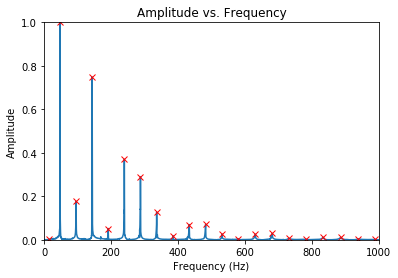

In [54]:
# c = sample(0.2, 10, data[0])
# peaks, _ = find_peaks(c.sy, distance=200)
# plt.plot(c.sx, c.sy, [c.sx[peak] for peak in peaks], [c.sy[peaks] for peak in peaks], 'rx')
# plt.axis([0, 1500, 0, 1])
c = wavdataparser('data/recording_2/AC_LOW_G.wav')
o = sample(0, 3, c)
peaks, _ = find_peaks(o.sy, distance=200)
plt.plot(o.sx, o.sy, o.sx[peaks], o.sy[peaks], 'rx')
plt.axis([0, 1000, 0, 1])

# Fourier Data Plot

# plotting Amp Time graphs
# plt.axis([0.1, 0.15, -1, 1]) # cycles
plt.title("Amplitude vs. Frequency")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
# plt.show()
plt.savefig("imgs/fourierpeaks.svg", type="svg")

[ 121  287  453  620  787  953 1120 1286 1453 1620 1785 1952 2118 2285
 2452 2618 2785 2951 3118 3284 3451 3617 3784 3951 4117 4283]
121.2 3451.2


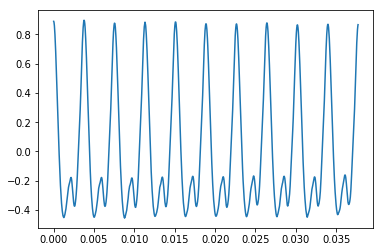

In [5]:
t, n = 0.2, 10           # Start time, number of oscillations
c = sample(t, t + 0.1, data[3])
peaks, _ = find_peaks(c.y, distance=100)
print(peaks)
print(t + peaks[0], t + peaks[20])
c_mod = sample(t + c.x[peaks[0]], t + c.x[peaks[10]], data[3])
plt.plot(c_mod.x, c_mod.y)
# plt.axis([0, 0.05, -1, 1])

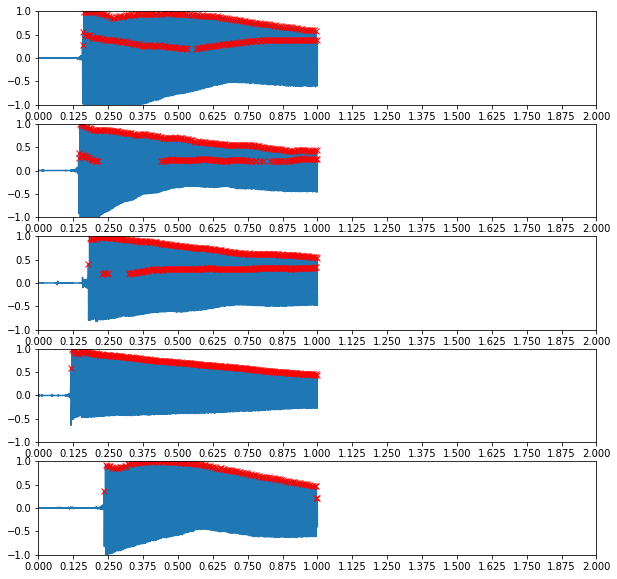

In [12]:
# Graphing Volume Decay
fig, ax = plt.subplots(5)
fig.set_size_inches(10, 10)
data[0].print_graph(ax[0])
data[1].print_graph(ax[1])
data[2].print_graph(ax[2])
data[3].print_graph(ax[3])
data[4].print_graph(ax[4])

oooooooooooooooooooooooooooooo
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

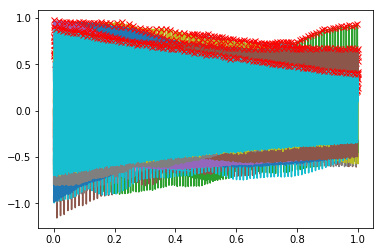

In [55]:
# Saving Data
times = pd.read_csv('time_data.csv')
# times = times.append(pd.DataFrame([['AC', 2, 3]],columns=list(times.columns)), ignore_index=True)
print(30 * 'o')
for arr in np.array(times):
    data = wavdataparser('data/recording_2/' + str(arr[0]) + '.wav')       # Creates / Reads from file string
    clip = sample(arr[1], arr[1] + 1, data)                                # Extracts a 1000 millisecond sample
    np.save("data/analyzed/" + arr[0] + "_DATA", clip.getSampleData(arr[2]))
    print('x', end='')

[0, 0.05, -1, 1]

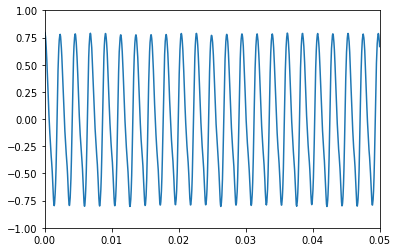

In [9]:
testdata = np.load('data/analyzed/EL_HIGH_A_DATA.npy')
plt.plot(testdata[0], testdata[1])
plt.axis([0, 0.05, -1, 1])
# plt.plot(testdata[2], testdata[3])
# plt.axis([0, 100, 0, 1])
# # peaks, _ = find_peaks(testdata[3], distance=25)
# # x_pts = [testdata[2][peak] for peak in peaks]
# # y_pts = [testdata[3][peak] for peak in peaks]
# # plt.plot(x_pts, y_pts, 'rx')
# print(peaks)
# # plt.plot(testdata[0], testdata[1])

times = pd.read_csv('time_data.csv')
samples = []
times

In [6]:
pts = test.getUpperCurve()
c, _ = curve_fit(lambda t, a, b: a * np.exp(b * t), pts[0], pts[1])
f = lambda t: c[0] * np.exp(c[1] * t)
plt.plot(pts[0], pts[1], 'ro', pts[0], list(map(f, pts[0])),'b-')
plt.axis(test.t_axis)

NameError: name 'test' is not defined

[0, 2, -1, 1]

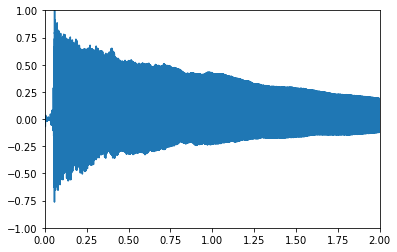

In [9]:
plt.plot(high.x, high.y)
plt.axis([0, 2, -1, 1])

0.22076668424393145

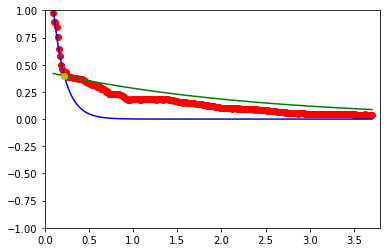

In [5]:
test.findInflectionPoint()

In [11]:
np.array([1,2,3,4]) - 1

array([0, 1, 2, 3])